Modeling Spatial Data with Statistics	-> It is geo data for graph Inerpolation
                                        ->Interpolation--> the process of using locations with known
                                        
                                         Three types of interpolation:
                                        1.Thiessen polygons (Voronoi diagrams)
                                        2.k-nearest neighbors (KNN)
                                        3.kriging

                                        
                                        
    Understanding the (x, y, z) of spatial data modeling 
	Introducing kriging
    
    -> It will use semivariogram --> paddy/wheat (5 tons of materials) 
    ->semivariogram determines how much influence a known point has on an unknown point as the distance between the known point and the unknown point increases
    
    
    Two ways to implement kriging
    1.scikit-learn 
    2.pykrige
    
	Krige for automated kriging interpolations
	Choosing and using models for explicitly-deined kriging interpolationsUsing Trend Surface Analysis on Spatial Data


In [1]:
pip install pykrige


  Using cached PyKrige-1.7.0.tar.gz (618 kB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pykrige: filename=PyKrige-1.7.0-cp311-cp311-win_amd64.whl size=183537 sha256=03eb147bc85d9c07e72e3c0cdd14977b299d450f7d276059feb80a5b33c12cb3
  Stored in directory: c:\users\bjawa\appdata\local\pip\cache\wheels\66\0c\07\84f14446c526fa52a0d47d5d9645b36a62064855cf60c1f49a
Successfully built pykrige


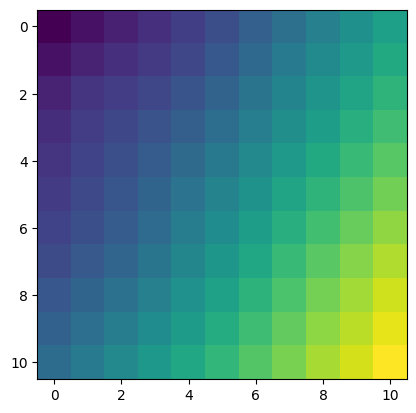

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pykrige.uk import UniversalKriging

data = np.array(
    [
        [0.3, 1.2, 0.47],
        [1.9, 0.6, 0.56],
        [1.1, 3.2, 0.74],
        [3.3, 4.4, 1.47],
        [4.7, 3.8, 1.74],
    ]
)
gridx = np.arange(0.0, 5.5, 0.5)
gridy = np.arange(0.0, 5.5, 0.5)
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)
z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

Dimensionality Reduction Using Feature Extraction	 -> Unsupervised Learning 
    Introduction
	Reducing Features Using Principal Components
	Reducing Features When Data Is Linearly Inseparable
	Reducing Features by Maximizing Class Separability
	Reducing Features Using Matrix Factorization
	Reducing Features on Sparse Data

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
            0         1         2       

<AxesSubplot: >

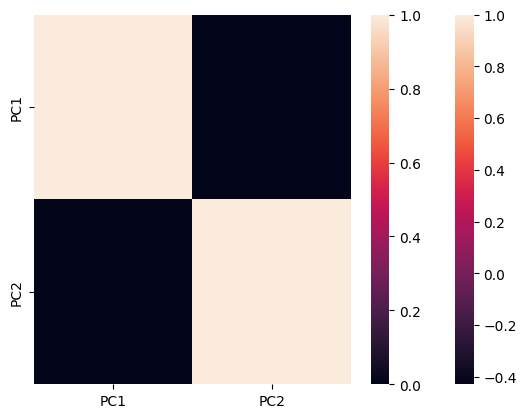

In [14]:
#Reducing Features Using Principal Components Analysis (PCA)

from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
#dataset importing
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print(df)
#data preprocessing
scalar=StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) 
print(scaled_data)
sns.heatmap(scaled_data.corr()) #-->before pca
#model creation
pri=PCA(n_components=2)
pri.fit(scaled_data)
data_pca=pri.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
print(data_pca)
sns.heatmap(data_pca.corr()) #-->after pca



When data is linearly inseparable 
    3 components: 
        1.n_components 
        2.Kernel 
        3.Gamma
        
1.Create a linearly inseprable data 
2.Applying PCA 
3.Applying PCA for 1st component 
4.Applying Kernel PCA 
5.Applying Kernel PCA for 1st component  

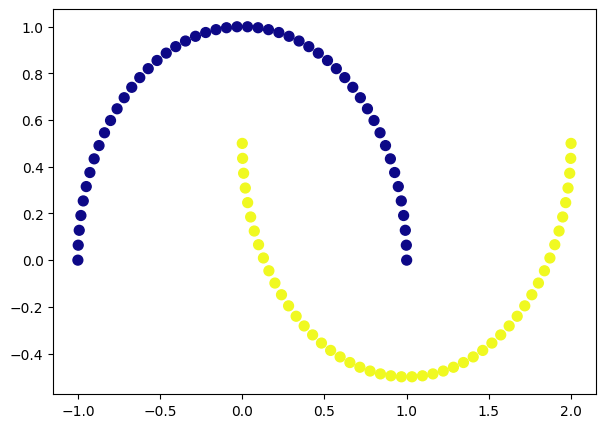

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=[7, 5])
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=None, 
                  random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='plasma')


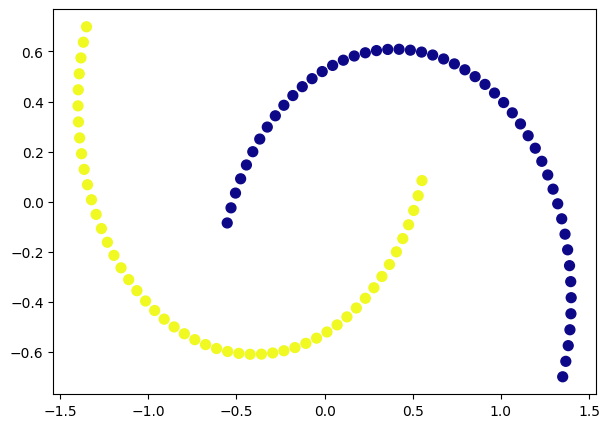

In [16]:
#apply pca

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=[7, 5])
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='plasma')

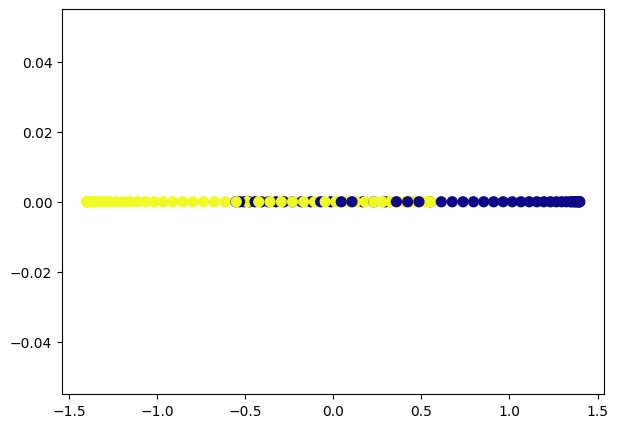

In [17]:
#apply pca for 1st components
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

plt.figure(figsize=[7, 5])
plt.scatter(X_pca[:, 0], np.zeros((100,1)), c=y, s=50, cmap='plasma')

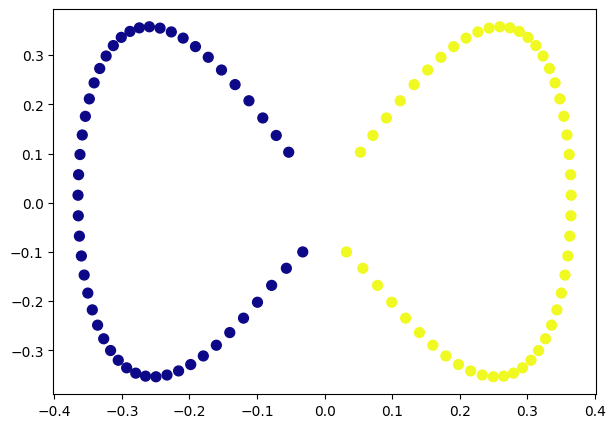

In [18]:
#apply kernel pca

from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
plt.figure(figsize=[7, 5])
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, s=50, cmap='plasma')

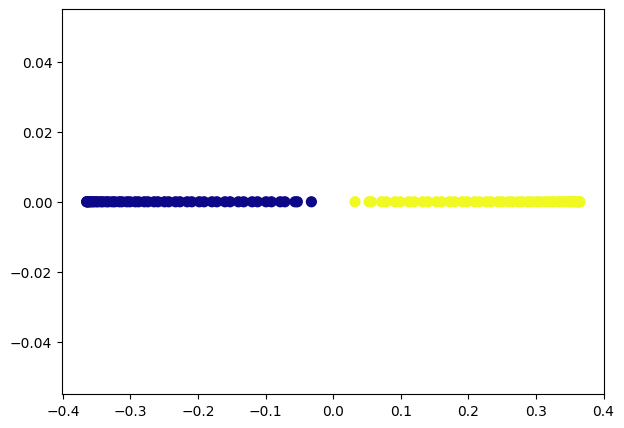

In [19]:
#apply kernel pca for 1st component
import numpy as np
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)
plt.figure(figsize=[7, 5])
plt.scatter(X_kpca[:, 0], np.zeros((100,1)), c=y, s=50, cmap='plasma')

In [ ]:
#Disadvantages of Kernel PCA
#It requires implementing a hyperparameter tuning technique such as 
    #Random Search  
    #Grid Search

#Reducing Features by Maximizing Class Separability
#Reducing Features Using Matrix Factorization

->Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations 
->It is otherwise known as matrix factorization


1.LU Matrix Decomposition
2.QR Matrix Decomposition 
3.Cholesky Decomposition



In [20]:
#LU Matrix Decomposition  --> (P.L.U)

from numpy import array
from scipy.linalg import lu
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
P, L, U = lu(A)

B = P.dot(L).dot(U)
print(B)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [22]:
# QR decomposition-> A=QR

from numpy import array
from numpy.linalg import qr
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
Q, R = qr(A, 'complete')
B=Q.dot(R)
print(B)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [25]:
# Cholesky decomposition ->A = U^T . U

from numpy import array
from numpy.linalg import cholesky
A = array([[2, 1, 1], [1, 2, 1], [1, 1, 2]])
L = cholesky(A)
B=L.dot(L.T)
print(L)
print(L.T)
print(B)

[[1.41421356 0.         0.        ]
 [0.70710678 1.22474487 0.        ]
 [0.70710678 0.40824829 1.15470054]]
[[1.41421356 0.70710678 0.70710678]
 [0.         1.22474487 0.40824829]
 [0.         0.         1.15470054]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]


#Reducing Features on Sparse Data --> Value will have 0 in its value

Ways to Deal with Sparse Datasets

1.Convert the feature to dense from sparse
    ->Use Principle Component Analysis
    ->Use Feature Hashing
    ->Perform Feature Selection and Feature Extraction
    ->Use t-Distributed Stochastic Neighbor Embedding (t-SNE)
    ->Use low variance filter
2.Remove the features from the model
3.Use methods that are not affected by sparse datasets



In [27]:
import pandas as pd
import numpy as np
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['SepalLength','SepalWidth','PetalLength','PetalWidth','label'])
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth           label
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [36]:
#Use Feature Hashing:
#refer :https://scikit-learn.org/stable/auto_examples/text/plot_hashing_vs_dict_vectorizer.html#sphx-glr-auto-examples-text-plot-hashing-vs-dict-vectorizer-py
#for real time data set
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=4)
p = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(p)
print(p)
print(h)
print(f.toarray())


[{'dog': 1, 'cat': 2, 'elephant': 4}, {'dog': 2, 'run': 5}]
FeatureHasher(n_features=4)
[[ 0. -1. -4.  2.]
 [-5. -2.  0.  0.]]


In [42]:
#Dropping a column having sparse datatype:

import pandas as pd
import numpy as np

a=pd.DataFrame({"A":pd.arrays.SparseArray([0,1,0])})
print(a)

b=a.sparse.to_dense()
print(b)


   A
0  0
1  1
2  0
   A
0  0
1  1
2  0
